# **Importing zipfile**

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-06-02 16:58:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.6MB/s    in 5.8s    

2025-06-02 16:59:05 (18.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

# Processing data

In [3]:
import tensorflow as tf
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.,rotation_range=0.2,shear_range=0.2,zoom_range = 0.2,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory("pizza_steak/train",batch_size=32,target_size=(224,224),class_mode="binary",seed=42,shuffle=True)
test_data = test_datagen.flow_from_directory("pizza_steak/test",batch_size=32,shuffle=True,target_size=(224,224),class_mode="binary",seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


# Visualizing the data

In [4]:
train_data[0] #this is a tuple with (array[batch,train_data..]),array[labels])

(array([[[[0.24813184, 0.24634862, 0.27772117],
          [0.24813057, 0.2463476 , 0.27772015],
          [0.24812931, 0.24634658, 0.27771914],
          ...,
          [0.3153946 , 0.25713986, 0.23711364],
          [0.37294522, 0.3175717 , 0.29623887],
          [0.36982703, 0.31548983, 0.30391333]],
 
         [[0.18867251, 0.196254  , 0.22509938],
          [0.18866746, 0.19624968, 0.22509483],
          [0.18866238, 0.19624539, 0.22509028],
          ...,
          [0.42068103, 0.3519227 , 0.32926628],
          [0.31720293, 0.25062537, 0.23359305],
          [0.31656614, 0.2622248 , 0.25064698]],
 
         [[0.1374565 , 0.16088513, 0.19125208],
          [0.13745448, 0.1608841 , 0.19125132],
          [0.13745245, 0.1608831 , 0.19125056],
          ...,
          [0.49253535, 0.41233036, 0.3910691 ],
          [0.42905566, 0.3614156 , 0.33682033],
          [0.29351416, 0.24200055, 0.22164467]],
 
         ...,
 
         [[0.33333334, 0.27450982, 0.24705884],
          [0.33333

In [5]:
type(train_data[0])

tuple

In [6]:
(images,labels) = train_data[0]

Text(0.5, 1.0, 'steak')

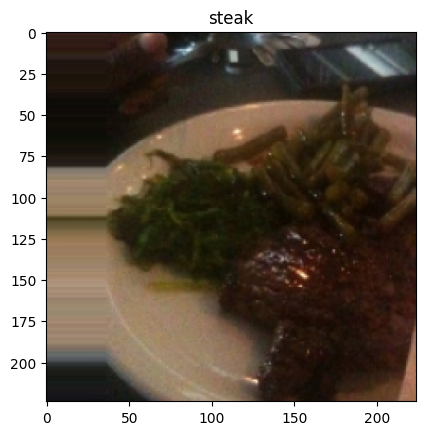

In [7]:
random_n = random.randint(0,32)
plt.imshow(images[random_n])
plt.title('pizza' if labels[random_n]==0 else 'steak')

Building Model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')

])


model.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Fitting data to the model

In [9]:
history = model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 521ms/step - accuracy: 0.5309 - loss: 0.6916 - val_accuracy: 0.5500 - val_loss: 0.6625
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 435ms/step - accuracy: 0.6729 - loss: 0.6044 - val_accuracy: 0.8180 - val_loss: 0.4144
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 449ms/step - accuracy: 0.7596 - loss: 0.4956 - val_accuracy: 0.8540 - val_loss: 0.3410
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 446ms/step - accuracy: 0.8112 - loss: 0.4377 - val_accuracy: 0.8460 - val_loss: 0.3741
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 41s 445ms/step - accuracy: 0.7666 - loss: 0.5010 - val_accuracy: 0.8600 - val_loss: 0.3440


# Visualizing the loss Vs epochs

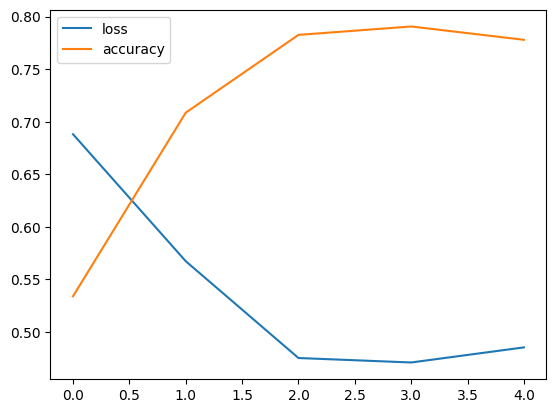

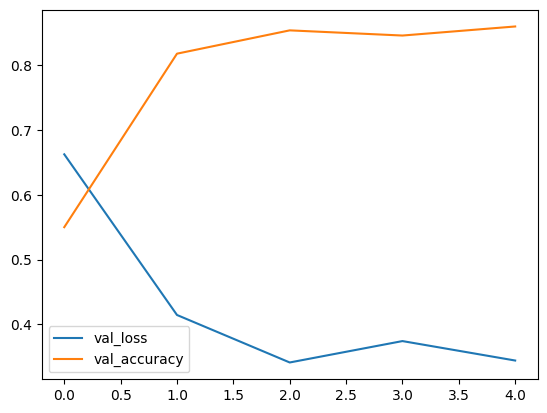

In [11]:
def plot_model_performance(model,istory):
  loss = istory.history['loss']
  accuracy = istory.history['accuracy']
  val_loss = istory.history['val_loss']
  val_accuracy = istory.history['val_accuracy']
  epochs=np.arange(0,len(loss))

  plt.figure()
  plt.plot(epochs,loss,label='loss')
  plt.plot(epochs,accuracy,label='accuracy')
  plt.legend()
  plt.show()

  plt.figure()
  plt.plot(epochs,val_loss,label='val_loss')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.legend()
  plt.show()

plot_model_performance(model,history)




# Predicting result for a new datapoint with our model

In [33]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2025-06-02 17:16:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.4’

03-pizza-dad.jpeg.4 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2025-06-02 17:16:28 (275 MB/s) - ‘03-pizza-dad.jpeg.4’ saved [2874848/2874848]

--2025-06-02 17:16:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

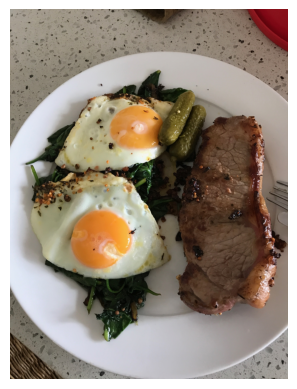

In [34]:
img = mpimg.imread('03-steak.jpeg')
plt.imshow(img)
plt.axis(False)

In [36]:
img.shape

(4032, 3024, 3)

In [37]:
img = tf.image.resize(img,size=(224,224))
img = img/255.
img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6406863 , 0.625     , 0.58186275],
        [0.65931374, 0.62990195, 0.59166664],
        [0.6357843 , 0.60833335, 0.56911767],
        ...,
        [0.5230392 , 0.05245098, 0.09166667],
        [0.5004902 , 0.04166667, 0.07696079],
        [0.53186274, 0.07696079, 0.1122549 ]],

       [[0.6632353 , 0.64754903, 0.6122549 ],
        [0.6387255 , 0.6230392 , 0.57990193],
        [0.6607843 , 0.62941176, 0.5862745 ],
        ...,
        [0.5352941 , 0.06764706, 0.09411765],
        [0.53186274, 0.06127451, 0.1004902 ],
        [0.5254902 , 0.05490196, 0.09411765]],

       [[0.65392154, 0.6382353 , 0.59117645],
        [0.64362746, 0.6122549 , 0.56911767],
        [0.65931374, 0.6279412 , 0.58480394],
        ...,
        [0.53382355, 0.06715687, 0.08480392],
        [0.53382355, 0.06617647, 0.10343137],
        [0.525     , 0.05441177, 0.09362745]],

       ...,

       [[0.49656862, 0.4254902 , 0.31813726],
        [0.05

In [38]:
img.shape

TensorShape([224, 224, 3])

In [39]:
prob = model.predict(tf.expand_dims(img,axis=0))
label = 'pizza' if prob < 0.5 else 'steak'
print(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
steak


Text(0.5, 1.0, 'steak')

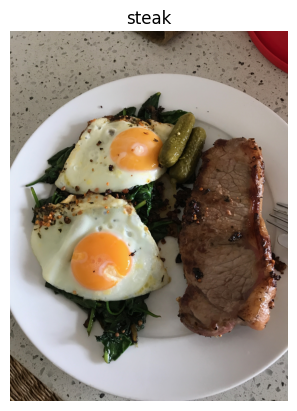

In [41]:
img_original = mpimg.imread('03-steak.jpeg')
plt.imshow(img_original)
plt.axis(False)
plt.title(label)

# Model Summary

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

# Saving Model

In [44]:
model.save('binary_Image_classification.h5')